In [4]:
import importlib
import json
import os
from collections import defaultdict
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plot_utils
import seaborn as sns
from IPython.display import display
from plot_utils import TASK_TO_LABEL_MAPPING
from plot_utils import v2_colors as COLORS

import fusion_bench as fb
from fusion_bench.utils.json import load_from_json

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

PROJECT_ROOT = fb.constants.PROJECT_ROOT_PATH

In [15]:
def to_dataframe(results):
    """
    Convert the results to a pandas dataframe.
    """
    df_dict = defaultdict(list)
    for model_name in results.keys():
        for task, task_results in results[model_name].items():
            if task == "model_info":
                continue
            df_dict["model_name"].append(model_name)
            df_dict["task"].append(task)
            df_dict["accuracy"].append(task_results["accuracy"])
            df_dict["loss"].append(task_results["loss"])
    df = pd.DataFrame(df_dict)
    return df

In [17]:
clip_vit_base_patch32_TA8_results = load_from_json(
    "results/clip-vit-base-patch32/TA8.json"
)
clip_vit_base_patch32_TA8_df = to_dataframe(clip_vit_base_patch32_TA8_results)
clip_vit_base_patch32_TA8_df

,model_name,task,accuracy,loss
0,sun397,sun397,0.739345,0.873789
1,sun397,stanford-cars,0.577789,1.286882
2,sun397,resisc45,0.606508,1.303935
3,sun397,eurosat,0.504815,1.422003
4,sun397,svhn,0.331861,1.989834
...,...,...,...,...
76,merged,svhn,0.918984,0.283496
77,merged,gtsrb,0.925257,0.281970
78,merged,mnist,0.988600,0.043684
79,merged,dtd,0.638298,1.353207


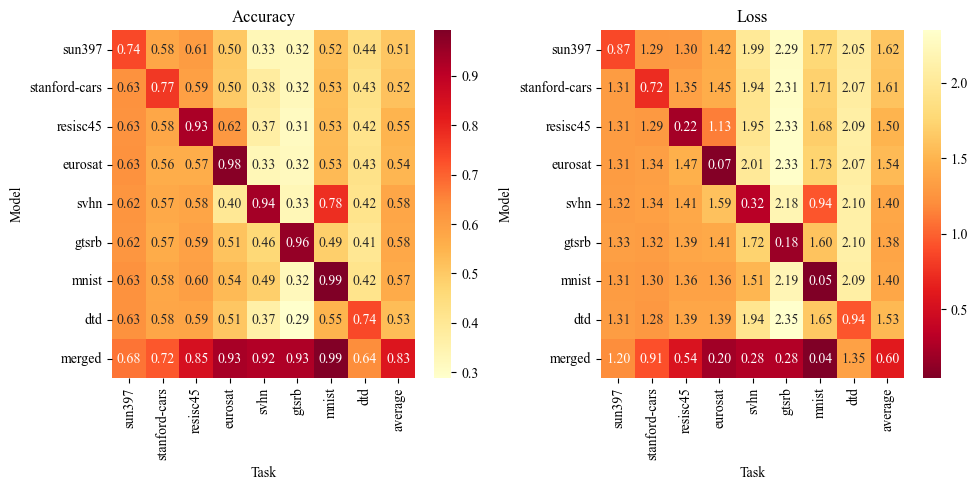

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Get unique tasks and models in original order
tasks = clip_vit_base_patch32_TA8_df["task"].unique()
models = clip_vit_base_patch32_TA8_df["model_name"].unique()

# plot the accuracy matrix
ax: plt.Axes = axes[0]
accuracy_pivot = clip_vit_base_patch32_TA8_df.pivot(
    index="model_name", columns="task", values="accuracy"
)
# Reorder columns and rows to match original order
accuracy_pivot = accuracy_pivot.reindex(index=models, columns=tasks)
sns.heatmap(accuracy_pivot, annot=True, fmt=".2f", cmap="YlOrRd", ax=ax)
ax.set_title("Accuracy")
ax.set_xlabel("Task")
ax.set_ylabel("Model")

# plot the loss matrix
ax: plt.Axes = axes[1]
loss_pivot = clip_vit_base_patch32_TA8_df.pivot(
    index="model_name", columns="task", values="loss"
)
# Reorder columns and rows to match original order
loss_pivot = loss_pivot.reindex(index=models, columns=tasks)
sns.heatmap(loss_pivot, annot=True, fmt=".2f", cmap="YlOrRd_r", ax=ax)
ax.set_title("Loss")
ax.set_xlabel("Task")
ax.set_ylabel("Model")

plt.tight_layout()
plt.show()